In [51]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [4]:
loan_data =  pd.read_csv('LendingClub.csv', low_memory=False)

In [5]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,124036600,NaN,14400.0,14400.0,14400.0,60 months,11.99,320.25,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,124032422,NaN,10000.0,10000.0,10000.0,36 months,6.08,304.59,A,A2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,121263276,NaN,9000.0,9000.0,9000.0,36 months,9.93,290.11,B,B2,...,NaN,NaN,DirectPay,N,NaN,NaN,NaN,NaN,NaN,NaN
3,124031429,NaN,25000.0,25000.0,25000.0,60 months,9.44,524.32,B,B1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,122281350,NaN,17000.0,17000.0,17000.0,36 months,19.03,623.42,D,D3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data = loan_data[['loan_amnt', 'term', 'int_rate', 'installment', 
                 'grade', 'sub_grade', 'emp_length', 
                 'home_ownership', 'annual_inc', 'verification_status', 
                 'purpose', 'dti', 'delinq_2yrs', 'delinq_amnt', 
                 'chargeoff_within_12_mths',  'tax_liens',  
                 'acc_now_delinq', 'inq_last_12m', 'open_il_24m', 
                 'loan_status']]
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,delinq_amnt,chargeoff_within_12_mths,tax_liens,acc_now_delinq,inq_last_12m,open_il_24m,loan_status
0,14400.0,60 months,11.99,320.25,B,B5,< 1 year,RENT,73000.0,Verified,debt_consolidation,21.50,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Current
1,10000.0,36 months,6.08,304.59,A,A2,10+ years,MORTGAGE,100000.0,Source Verified,other,11.30,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Current
2,9000.0,36 months,9.93,290.11,B,B2,NaN,MORTGAGE,44000.0,Not Verified,debt_consolidation,23.49,0.0,0.0,0.0,0.0,0.0,1.0,2.0,Current
3,25000.0,60 months,9.44,524.32,B,B1,10+ years,RENT,77573.0,Verified,debt_consolidation,18.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Current
4,17000.0,36 months,19.03,623.42,D,D3,< 1 year,MORTGAGE,105000.0,Not Verified,debt_consolidation,6.17,1.0,0.0,0.0,0.0,0.0,2.0,0.0,Fully Paid


In [7]:
data.isnull().sum()

loan_amnt                       6
term                            6
int_rate                        6
installment                     6
grade                           6
sub_grade                       6
emp_length                  23095
home_ownership                  6
annual_inc                      6
verification_status             6
purpose                         6
dti                           390
delinq_2yrs                     6
delinq_amnt                     6
chargeoff_within_12_mths        6
tax_liens                       6
acc_now_delinq                  6
inq_last_12m                   68
open_il_24m                    67
loan_status                     6
dtype: int64

In [8]:
data = data.dropna(axis = 'index', 
                   subset = ['annual_inc', 'dti', 'delinq_2yrs', 
                             'delinq_amnt', 'chargeoff_within_12_mths', 
                             'tax_liens', 'acc_now_delinq'])
data.isnull().sum()

loan_amnt                       0
term                            0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
emp_length                  22729
home_ownership                  0
annual_inc                      0
verification_status             0
purpose                         0
dti                             0
delinq_2yrs                     0
delinq_amnt                     0
chargeoff_within_12_mths        0
tax_liens                       0
acc_now_delinq                  0
inq_last_12m                   62
open_il_24m                    61
loan_status                     0
dtype: int64

In [9]:
data = data.fillna(value = {'emp_length' : 'no_info', 
                            'inq_last_12m' : 'no_info', 
                            'open_il_24m':'no_info'}) 

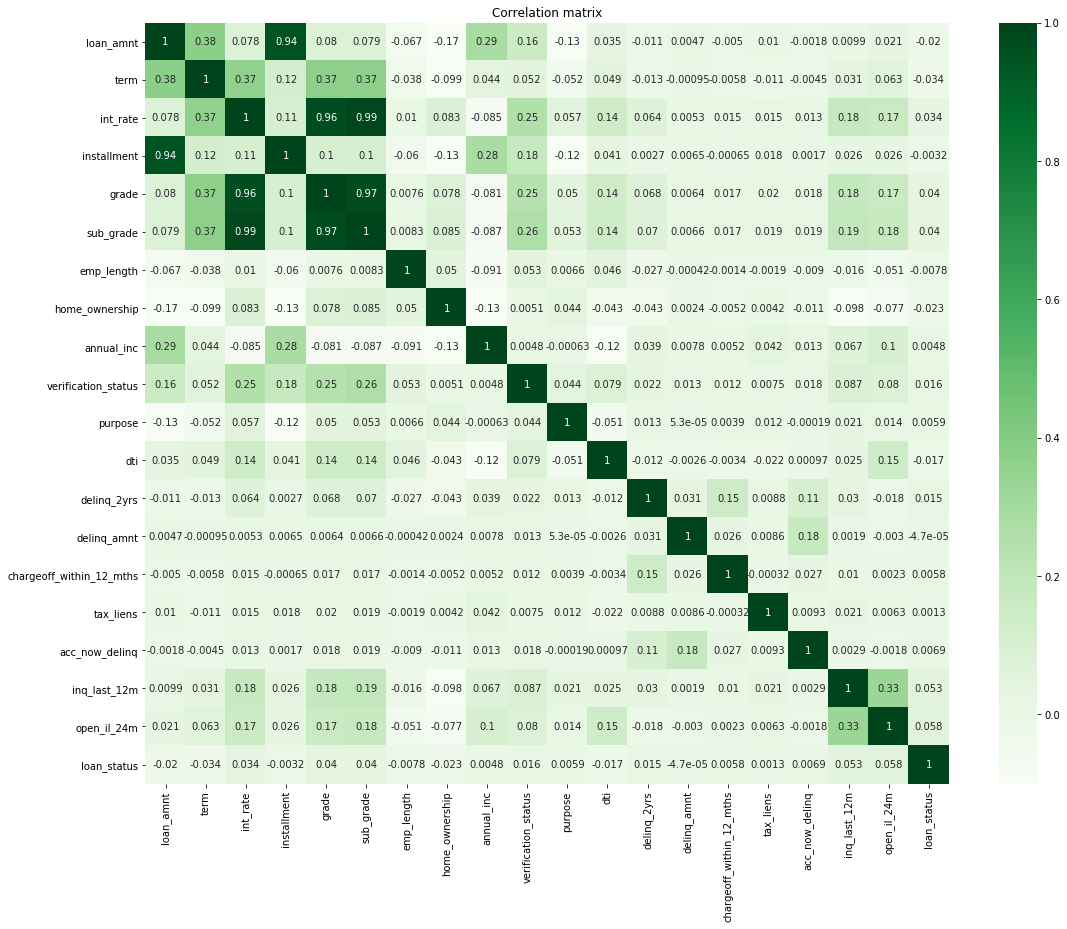

In [10]:
data_for_corr = data.assign(term = data.term.astype('category').cat.codes,
                            grade = data.grade.astype('category').cat.codes,
                            sub_grade = data.sub_grade.astype('category').cat.codes,
                            emp_length = data.emp_length.astype('category').cat.codes,
                            home_ownership = data.home_ownership.astype('category').cat.codes,
                            verification_status = data.verification_status.astype('category').cat.codes,
                            purpose = data.purpose.astype('category').cat.codes,
                            loan_status = data.loan_status.astype('category').cat.codes,
                            inq_last_12m = data.inq_last_12m.astype('category').cat.codes,
                            open_il_24m = data.open_il_24m.astype('category').cat.codes
                            )

corr_matrix = data_for_corr.corr()
plt.figure(figsize=(18,14))
sn.heatmap(corr_matrix, annot=True, cmap = 'Greens',vmin=-0.1, vmax=1)
plt.title('Correlation matrix')
plt.show()

In [11]:
data = data.drop(columns = ['installment', 'grade', 'sub_grade', 'open_il_24m'])

In [12]:
data_inq_nan = data[data.inq_last_12m == 'no_info']
pd.DataFrame({'where inq_last_12m=NaN': data_inq_nan['loan_status'].value_counts()/len(data_inq_nan), 
              'all dataset'           : data['loan_status'].value_counts()/len(data)}
             ).style.format('{:.2f}')

,where inq_last_12m=NaN,all dataset
Charged Off,0.16,0.05
Current,0.56,0.74
Default,nan,0.00
Fully Paid,0.23,0.18
In Grace Period,0.02,0.01
Late (16-30 days),0.02,0.00
Late (31-120 days),0.02,0.02


In [13]:
data_3_statuses = data[(data.loan_status == 'Fully Paid') | (data.loan_status == 'Charged Off') | 
                 (data.loan_status == 'Default')]
data_inq_nan = data_3_statuses[data_3_statuses.inq_last_12m == 'no_info']
pd.DataFrame({'where inq_last_12m=NaN': 
              data_inq_nan['loan_status'].value_counts()/len(data_inq_nan), 
              'all dataset': 
              data_3_statuses['loan_status'].value_counts()/len(data_3_statuses)}
             ).style.format('{:.2f}')

,where inq_last_12m=NaN,all dataset
Charged Off,0.42,0.23
Default,nan,0.00
Fully Paid,0.58,0.77


In [14]:
data = data.drop(columns = 'inq_last_12m')

In [15]:
data['loan_status'].value_counts()

Current               221586
Fully Paid             52978
Charged Off            15782
Late (31-120 days)      5174
In Grace Period         2680
Late (16-30 days)       1397
Default                   13
Name: loan_status, dtype: int64

In [16]:
data = data[(data.loan_status == 'Fully Paid') | (data.loan_status == 'Charged Off') | 
                 (data.loan_status == 'Default')]
data['loan_status'] = data['loan_status'].replace(to_replace = ['Fully Paid', 'Charged Off', 'Default'], 
                                                       value = [0, 1, 1])
data['loan_status'].value_counts()

0    52978
1    15795
Name: loan_status, dtype: int64

In [17]:
data.describe().style.format('{:.2f}')

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,delinq_amnt,chargeoff_within_12_mths,tax_liens,acc_now_delinq,loan_status
count,68773.00,68773.00,68773.00,68773.00,68773.00,68773.00,68773.00,68773.00,68773.00,68773.00
mean,15151.02,13.26,80059.17,19.23,0.31,19.23,0.01,0.06,0.01,0.23
std,9236.35,5.23,89889.74,12.99,0.86,807.58,0.12,0.41,0.07,0.42
min,1000.00,5.31,33.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,8000.00,9.17,49000.00,11.95,0.00,0.00,0.00,0.00,0.00,0.00
50%,13000.00,11.99,68000.00,18.22,0.00,0.00,0.00,0.00,0.00,0.00
75%,20225.00,16.29,95000.00,25.38,0.00,0.00,0.00,0.00,0.00,0.00
max,40000.00,30.99,9550000.00,999.00,21.00,76929.00,9.00,45.00,2.00,1.00


In [18]:
X = data.iloc[:, 0:-1].values
y = data.iloc[:, -1].values

In [19]:
from sklearn.preprocessing import LabelEncoder

labelencoder_X = LabelEncoder()
X[:, 1] = labelencoder_X.fit_transform(X[:, 1])
X[:, 3] = labelencoder_X.fit_transform(X[:, 3])

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer([('one_hot_encoder', OneHotEncoder(categories='auto'), [4, 6, 7])],
                       remainder='passthrough')
X = ct.fit_transform(X)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [22]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
def prepare_data(data):
    X = data.iloc[:, 0:-1].values
    y = data.iloc[:, -1].values
    
    labelencoder_X = LabelEncoder()
    X[:, 1] = labelencoder_X.fit_transform(X[:, 1])
    X[:, 3] = labelencoder_X.fit_transform(X[:, 3])
    
    ct = ColumnTransformer([('one_hot_encoder', OneHotEncoder(categories='auto'), [4, 6, 7])],
                       remainder='passthrough')
    X = ct.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    return X_train, X_test, y_train, y_test

In [24]:
X_train, X_test, y_train, y_test = prepare_data(data)

# # Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB

classifier_naive_bayes = GaussianNB()
classifier_naive_bayes.fit(X_train, y_train)
y_pred = classifier_naive_bayes.predict(X_test)

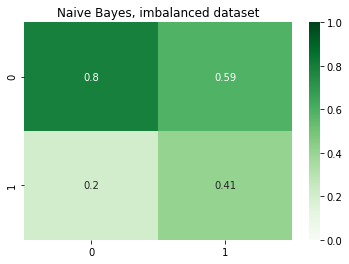

In [56]:
from sklearn.metrics import confusion_matrix

def build_conf_matrix(title):
    conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred))
    sn.heatmap(conf_matrix/np.sum(conf_matrix) , annot=True, cmap='Greens',vmin=0, vmax=1)
    plt.title(title)
    plt.show()
    
build_conf_matrix(title='Naive Bayes, imbalanced dataset')

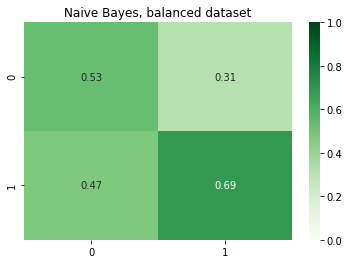

In [57]:
data_loan_status_1 = data[data['loan_status'] == 1]
data_loan_status_0 = data[data['loan_status'] == 0].sample(n=len(data_loan_status_1))
data_balanced = data_loan_status_1.append(data_loan_status_0) 

X_train, X_test, y_train, y_test = prepare_data(data_balanced)

classifier_naive_bayes = GaussianNB()
classifier_naive_bayes.fit(X_train, y_train)
y_pred = classifier_naive_bayes.predict(X_test)

build_conf_matrix(title='Naive Bayes, balanced dataset')

# Random Forest model:

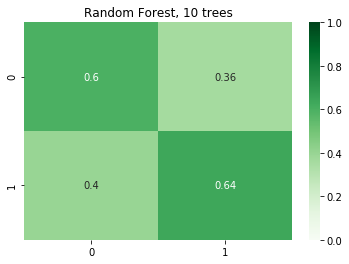

In [58]:
from sklearn.ensemble import RandomForestClassifier

classifier_rand_forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
classifier_rand_forest.fit(X_train, y_train)
y_pred = classifier_rand_forest.predict(X_test)
build_conf_matrix(title='Random Forest, 10 trees')

In [59]:
from sklearn.model_selection import GridSearchCV

parameters = [ {'n_estimators':[10, 50, 100, 200], 'criterion':['entropy', 'gini']}]
grid_search = GridSearchCV(estimator = classifier_rand_forest, 
                                 param_grid = parameters,
                                 scoring = 'accuracy',
                                 cv = 2,
                                 n_jobs = -1,
                                 verbose = 5)
grid_search = grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 8 candidates, totalling 16 fits


In [60]:
grid_search.best_params_

{'criterion': 'gini', 'n_estimators': 200}

In [61]:
grid_search.best_score_

0.6399206483201081

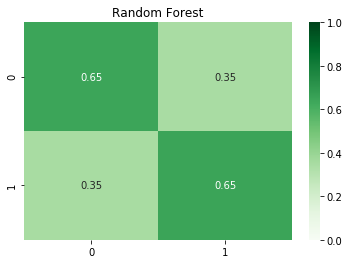

In [78]:
classifier_rand_forest = RandomForestClassifier(n_estimators = 200, criterion = 'gini')
classifier_rand_forest.fit(X_train, y_train)
y_pred = classifier_rand_forest.predict(X_test)
build_conf_matrix(title='Random Forest')

# Logistic Regression:

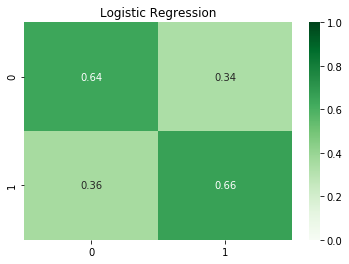

In [63]:
from sklearn.linear_model import LogisticRegression

classifier_log_reg = LogisticRegression()
classifier_log_reg.fit(X_train, y_train)
y_pred = classifier_log_reg.predict(X_test)
build_conf_matrix(title='Logistic Regression')

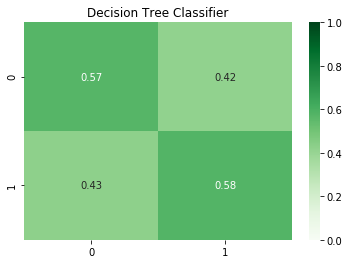

In [75]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
build_conf_matrix(title='Decision Tree Classifier')

In [64]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = classifier_naive_bayes, X = X_train, y = y_train, cv = 5)
('Naive Bayes',{'accuracy':accuracies.mean(), 'std':accuracies.std()})

('Naive Bayes', {'accuracy': 0.5547017371369711, 'std': 0.010132865816559951})

In [65]:
accuracies = cross_val_score(estimator = classifier_log_reg, X = X_train, y = y_train, cv = 5)
('Logistic Regression',{'accuracy':accuracies.mean(), 'std':accuracies.std()})

('Logistic Regression',
 {'accuracy': 0.6511481522026392, 'std': 0.006976597930012262})

In [66]:
accuracies = cross_val_score(estimator = classifier_rand_forest, X = X_train, y = y_train, cv = 2)
('Random Forest',{'accuracy':accuracies.mean(), 'std':accuracies.std()})

('Random Forest',
 {'accuracy': 0.6379790646631774, 'std': 0.0028279588046598025})

In [77]:
accuracies = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 2)
('Random Forest',{'accuracy':accuracies.mean(), 'std':accuracies.std()})

('Random Forest',
 {'accuracy': 0.5815887219314537, 'std': 0.004178625696437621})